In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,TensorBoard,ModelCheckpoint
from keras.layers import RandomRotation,RandomFlip,RandomZoom
from keras import layers
from keras.utils.np_utils import to_categorical

In [2]:
PATH = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Tensorflow/Fruits/datasets/train"
list = os.listdir(path=PATH)
list

['Banana', 'Kiwi', 'Apple']

In [ ]:
rasm = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Tensorflow/Fruits/datasets/train/Apple/103red applee00916103.png")

In [ ]:
rasm.shape

(322, 480, 3)

In [3]:
img = []
clas = []
Sampls = []
count = 0
for i in range(0,len(list)):
    Sample = 0
    #comment
    Piclist = os.listdir(PATH+"/"+list[i])
    #print(Piclist)
    #comment
    for j in Piclist:
        Img = cv2.imread(PATH+"/"+list[i]+"/"+j)
        Img = cv2.resize(Img,(300,300))
        Img = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)
        img.append(Img)
        clas.append(i)
        Sample+=1
    Sampls.append(Sample)
    print(count,end = " ")
    count+=1

0 1 2 

In [4]:
Sampls

[3517, 3439, 3164]

<BarContainer object of 3 artists>

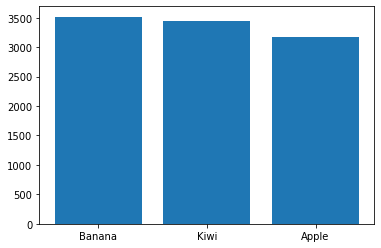

In [5]:
plt.bar(list,Sampls)

In [6]:
type(img)

list

In [7]:
img = np.array(img)
clas = np.array(clas)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(img, clas, test_size=0.2)

In [23]:
X_train = np.expand_dims(X_train,axis=0)
y_train = np.expand_dims(y_train,axis=0)

In [19]:
X_train.ndim

4

In [10]:
X_train.shape

(8096, 300, 300)

In [11]:
X_test.shape

(2024, 300, 300)

In [12]:
X_train.dtype

dtype('uint8')

In [13]:
X_train[0]

array([[109,  83,  67, ..., 223, 134, 103],
       [113, 101,  74, ..., 239, 168, 121],
       [112, 110,  98, ..., 247, 207, 138],
       ...,
       [228, 234, 240, ..., 193, 195, 195],
       [220, 243, 246, ..., 193, 193, 197],
       [185, 234, 245, ..., 191, 191, 197]], dtype=uint8)

In [14]:
X_train = X_train.astype("uint8")/255
X_test = X_test.astype("uint8") / 255
#X_validation = X_validation.astype("uint8") / 255"""

In [9]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
data_augmentation = Sequential([
    RandomFlip('horizontal'),
    RandomZoom(0.1),
    RandomRotation(0.1)
])

In [ ]:
dataGen= ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10 )

In [ ]:
dataGen.fit(X_train)

ValueError: ignored

In [ ]:
batches = dataGen.flow(X_train,y_train)

In [ ]:
X_batch,y_batch = next(batches)

In [ ]:
len(X_batch)

32

In [ ]:
y_batch

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
 

In [26]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(300,300,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation="softmax"))
model.compile(optimizer=Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [27]:
stopping = EarlyStopping(monitor='val_loss',
                         min_delta=0,
                         patience=3)

modelcheck = ModelCheckpoint("Checkpoints/_{epoch}.ckpt",
                            monitor='val_loss',
                            save_best_only=True)

In [22]:
y_train.size

24288

In [28]:
hisory = model.fit(X_train,y_train,epochs=1000,callbacks=[stopping,modelcheck])

Epoch 1/1000


ValueError: ignored

In [ ]:
model.evaluate(X_test,y_test)

21/21 [==============================] - 5s 234ms/step - loss: 5.6548e-04 - accuracy: 1.0000


[0.0005654802662320435, 1.0]

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Tensorflow/Fruits/Fruit2.h5")

In [ ]:
picture = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Tensorflow/Fruits/datasets/test/0024.jpg")

In [ ]:
picture.shape

(100, 100, 3)

In [ ]:
picture = picture/255

picture = tf.expand_dims(picture,0)

In [ ]:
predict = model.predict(picture)

1/1 [==============================] - 0s 33ms/step


In [ ]:
pred_class = list[np.argmax(predict[0])]
pred_class

'Cherry'